In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('loan_data_set.csv')

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [79]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)

In [81]:
IQR = Q3 - Q1

In [83]:
min_range = Q1 - (1.5 * IQR)
max_range = Q3 + (1.5 * IQR)

In [85]:
min_range,max_range

(-1498.75, 10171.25)

In [87]:
z_score = (df['ApplicantIncome'] - df['ApplicantIncome'].mean())/df['ApplicantIncome'].std()

In [89]:
z_score

0      0.072931
1     -0.134302
2     -0.393427
3     -0.461686
4      0.097649
         ...   
609   -0.409796
610   -0.212383
611    0.436818
612    0.356773
613   -0.134302
Name: ApplicantIncome, Length: 614, dtype: float64

In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
New_df = df[df['ApplicantIncome'] <= max_range]

{'whiskers': [<matplotlib.lines.Line2D at 0x16f16c7f380>,
 'caps': [<matplotlib.lines.Line2D at 0x16f16c7f950>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f16c7f080>],
 'medians': [<matplotlib.lines.Line2D at 0x16f16c7fdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f16ca4080>],
 'means': []}

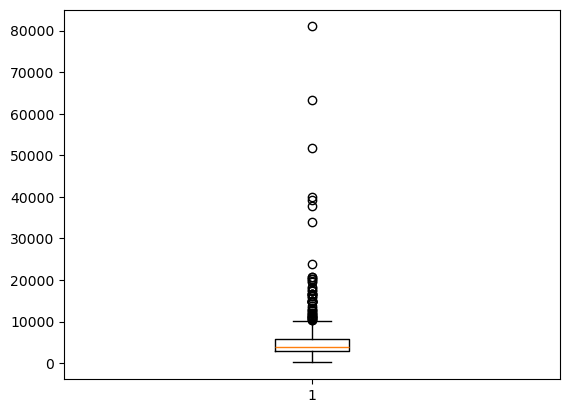

In [103]:
plt.boxplot(df['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome'>

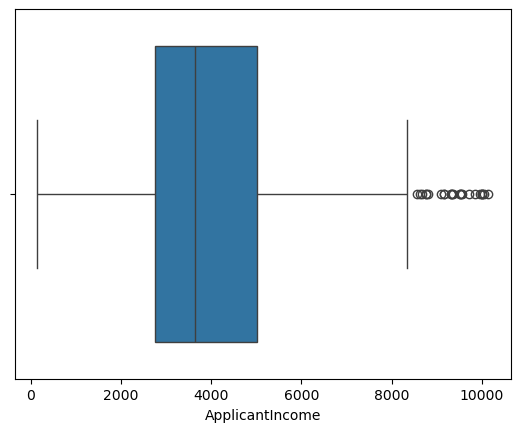

In [107]:
sns.boxplot(x = 'ApplicantIncome', data = New_df)

In [109]:
New_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,544.00000,550.000000,517.000000
mean,4124.723404,1692.294184,133.81250,341.890909,0.841393
std,1926.989806,2979.232330,59.06735,65.761526,0.365663
min,150.000000,0.000000,9.00000,12.000000,0.000000
25%,2744.000000,0.000000,100.00000,360.000000,1.000000
50%,3638.500000,1405.500000,124.00000,360.000000,1.000000
75%,5010.500000,2337.000000,159.25000,360.000000,1.000000
max,10139.000000,41667.000000,495.00000,480.000000,1.000000


In [132]:
list = ['ApplicantIncome','LoanAmount','CoapplicantIncome']

In [134]:
New_Data = 0
for x in list:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    min_range = Q1 - (1.5 * IQR)
    max_range = Q3 + (1.5 * IQR)
    New_Data = df[df[x] <= max_range]

In [140]:
New_Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
